# Training CNN model to predict Mask and No Mask  (Images)



# Install Packages

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

# Import Libraries 

In [24]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.1


In [25]:
train_data_path = "C:/Users/Preetam Patel/Desktop/mask detection/dataset/train"
validation_data_path = "C:/Users/Preetam Patel/Desktop/mask detection/dataset/valid"

# It generate more images using below ImageDataGenerator

In [26]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 200 * 200
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3647 images belonging to 2 classes.


In [27]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [28]:

valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


# Show augmented images


In [29]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

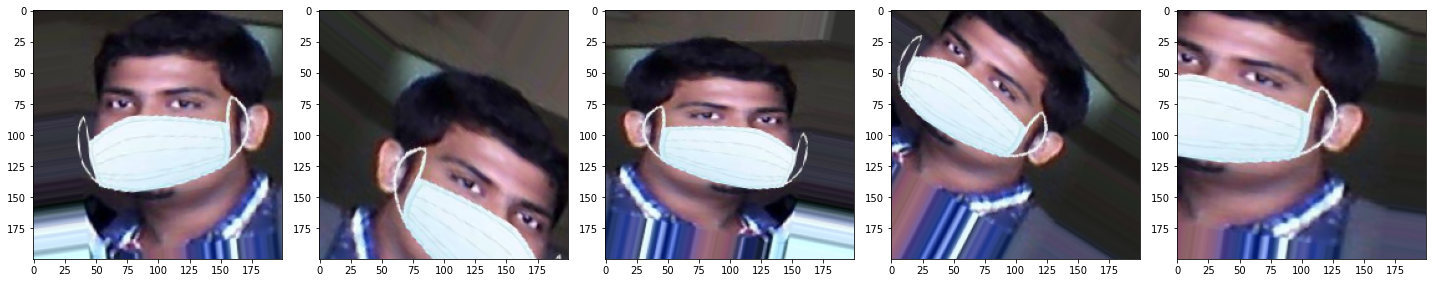

In [30]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

# Save best model using vall accuracy

In [31]:

model_path = 'C:/Users/Preetam Patel/Desktop/mask detection/model/cnn_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Building CNN_ Model

In [32]:

cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])




# Compile cnn model


In [33]:
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train cnn model

In [ ]:

history = cnn_model.fit(training_data, 
                          epochs=200, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/2
29/29 [==============================] - 181s 6s/step - loss: 0.5054 - accuracy: 0.6052 - val_loss: 0.3357 - val_accuracy: 0.6762

Epoch 00001: val_accuracy improved from -inf to 0.67618, saving model to C:/Users/Preetam Patel/Desktop/mask detection/model\cnn_model.h5
Epoch 2/2
23/29 [======================>.......] - ETA: 22s - loss: 0.3556 - accuracy: 0.5860

In [ ]:
cnn_model.save('C:/Users/Preetam Patel/Desktop/mask detection/model/model_last.h5')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
 
# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')